<a href="https://colab.research.google.com/github/COTILab/MCX24Workshop/blob/master/Training/MCX2024_plotting_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embed slides inside colab

Update the url with your google slides url <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To get the url: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;File > Share > Publish to web > (copy the url)

In [ ]:
#@title Colab slides
from IPython.display import HTML

# HTML iframe code for embedding Google Slides
iframe_code = """
<iframe src="https://docs.google.com/presentation/d/e/2PACX-1vSzrsBjJ3Epj18HDNReRF6tHARz1YS9_QjK7cVk11vf4bnKhD74tEJfwMW4hDRZFf0OFPPzeH8L1QbC/embed?start=false&loop=false&delayms=3000" frameborder="0" width="960" height="569" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>
"""

# Display the iframe using HTML function
display(HTML(iframe_code))


# Google forms examples

In [ ]:
#@title Form with Answer Checking { run: "auto" }
#@markdown Please answer the question (a number from 0 to 10):
student_answer = "5" #@param {type:"string"}

# Define the correct answer
correct_answer = "5"

# Check the answer
if student_answer == correct_answer:
    print("Correct!")
else:
    print(f"Incorrect. The correct answer is {correct_answer}.")


Correct!


In [ ]:
#@title Test button
from IPython.display import display, HTML

# Display HTML instructions before the widget
instructions = """
<h2>Task 1</h2>
<p>In Task 1, you will be trying some basic functions of MCXLAB and building a simple cubic
geometry with both homogeneous and heterogeneous materials.</p>
<p>(a) Please design a 100×100×100 homogeneous volume with property (μ a = 0.005 mm −1 , μ s =
10 mm −1 , g = 0.9, n = 1.37). Then add a pencil beam source (default) in the position
(50, 50, 1) and the direction is (0, 0, 1). The photon count is 10 6 . After running MCXLAB,
please plot the volume using log10. (Here you only need to consider one time gate, meaning
cf g.tstart = 0, cf g.tend = 1e − 8, cf g.tstep = 1e − 8)</p>
<p>(b) Based on the setup you have in (a), add an absorber inside the volume (30 : 70, 30 :
70, 30 : 70). The property of the absorber is (μ a = 0.05 mm −1 , μ s = 10 mm −1 , g =
0.9, n = 1.37).</p>
<p>(c) Try playing with the photon count and see how the photon count affects the results.</p>
"""

display(HTML(instructions))

# Create and display the widgets
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a button and a text input widget
answer = widgets.Text(
    value='',
    placeholder='Type your answer here',
    description='Answer:',
    disabled=False
)

button = widgets.Button(description="Submit")
output = widgets.Output()

# Define the correct answer
correct_answer = "42"

# Function to handle button click
def on_button_clicked(b):
    with output:
        clear_output()
        if answer.value == correct_answer:
            print("Correct!")
        else:
            print(f"Incorrect. The correct answer is {correct_answer}.")

# Link function to button click event
button.on_click(on_button_clicked)

# Display the widgets
display(answer, button, output)


Text(value='', description='Answer:', placeholder='Type your answer here')

Button(description='Submit', style=ButtonStyle())

Output()

# Plotting 3d slices - basically equal to mcxplot

## plot with control bar

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import numpy as np
import copy
import plotly.graph_objects as go
from ipywidgets import interactive
import plotly.express as px

# randomly generated data for demonstrate, replace this with your actual simulation data
flux_data = np.random.normal(size=(60, 60, 60))
new_data = copy.deepcopy(np.log10(np.abs((flux_data))+1))
# flux_data = copy.deepcopy(res['flux'])
# new_data = copy.deepcopy(np.log10(flux_data))


vmax = new_data.max()
vmin = new_data.min()

# Create a meshgrid
x = np.linspace(0, flux_data.shape[0]-1, flux_data.shape[0])
y = np.linspace(0, flux_data.shape[1]-1, flux_data.shape[1])
z = np.linspace(0, flux_data.shape[2]-1, flux_data.shape[2])
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Interactive function to update plots
def update_plot(x_index=int(flux_data.shape[0]/2), y_index=int(flux_data.shape[1]/2), z_index=int(flux_data.shape[2]/2)):
    fig = go.Figure()

    fig.add_trace(go.Surface(z=Z[x_index, :, :], x=X[x_index, :, :], y=Y[x_index, :, :],
                             surfacecolor=new_data[x_index, :, :], colorscale='viridis',
                             cmin=vmin, cmax=vmax, showscale=False))

    fig.add_trace(go.Surface(z=Z[:, y_index, :], x=X[:, y_index, :], y=Y[:, y_index, :],
                            surfacecolor=new_data[:, y_index, :], colorscale='viridis',
                            cmin=vmin, cmax=vmax, showscale=False))


    fig.add_trace(go.Surface(x=X[:, :, z_index], y=Y[:, :, z_index], z=Z[:, :, z_index],
                             surfacecolor=new_data[:, :, z_index], colorscale='viridis',
                             cmin=vmin, cmax=vmax, showscale=True))

    fig.update_layout(title="3D Surface Slices", autosize=False,
                      width=800, height=800,
                      scene=dict(
                          xaxis_title='X axis',
                          yaxis_title='Y axis',
                          zaxis_title='Z axis'))
    fig.show()

# Create interactive widget
interactive_plot = interactive(update_plot, x_index=(0, flux_data.shape[0]-1), y_index=(0, flux_data.shape[1]-1), z_index=(0, flux_data.shape[2]-1))
interactive_plot


interactive(children=(IntSlider(value=30, description='x_index', max=59), IntSlider(value=30, description='y_i…

## Plot with function (no control bar)

In [ ]:
!git clone https://github.com/fanyuyen/MCXWorkshop2024pyPlot.git

In [ ]:
from MCXWorkshop2024pyPlot import plot_3d_slices
# generate example 3D volume
flux_data = np.random.normal(size=(60, 60, 60))
new_data = copy.deepcopy(np.log10(np.abs((flux_data))+1))

# Plotting with plot_3d_slices
plot_3d_slices(new_data) # default plotting middle slice
plot_3d_slices(new_data, x_index=0, y_index=0, z_index=59) # Assign the plotting slice index

# Ploting mesh - similar to plotmesh.m

## Create nodes and faces from octave using iso2mesh

In [ ]:
!apt-get install octave      # install octave to Linux host
!pip install oct2py          # install oct2py Python module

# add octave support to colab notebook
%load_ext oct2py.ipython

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf fonts-noto-mono
  fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts imagemagick-6-common info
  install-info libamd2 libauthen-sasl-perl libbtf1 libcamd2 libccolamd2 libcholmod3 libclone-perl
  libcolamd2 libcombblas1.16.0 libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl
  libevdev2 libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3 libfile-listing-perl
  libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40 libglu1-mesa libgraphicsmagick++-q16-12
  libgraphicsmagick-q16-3 libgs9 libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl

In [ ]:
!git clone https://github.com/fangq/iso2mesh  # download iso2mesh

Cloning into 'iso2mesh'...
remote: Enumerating objects: 3589, done.
remote: Counting objects: 100% (554/554), done.
remote: Compressing objects: 100% (317/317), done.
remote: Total 3589 (delta 288), reused 490 (delta 237), pack-reused 3035
Receiving objects: 100% (3589/3589), 125.53 MiB | 22.87 MiB/s, done.
Resolving deltas: 100% (2308/2308), done.


In [ ]:
%%octave
addpath([pwd filesep 'iso2mesh']);

tsize = 5

Surface Mesh Extraction Utility (Based on CGAL 3.8)

(modified for iso2mesh by Qianqian Fang)

http://iso2mesh.sf.net

RNG seed 1648335518

set initial mesh size to 50

Refining... maximum node number is set to 40000

done.

Final number of points: 234

WARNING- Some triangles have been reversed to achieve orientation.

Surface Mesh Extraction Utility (Based on CGAL 3.8)

(modified for iso2mesh by Qianqian Fang)

http://iso2mesh.sf.net

RNG seed 1648335518

set initial mesh size to 50

Refining... maximum node number is set to 40000

done.

Final number of points: 250

WARNING- Some triangles have been reversed to achieve orientation.

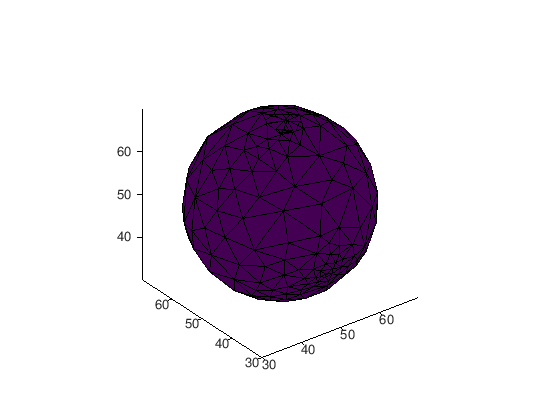

In [ ]:
%%octave
c0 = [50,50,50];
tsize = 5
[nsh1,fsh1] = meshasphere(c0, 15, tsize);
[nsh2,fsh2] = meshasphere(c0, 20, tsize);

nodes=[nsh2; nsh1];                                   % stack bbx nodes with letter-surface nodes
faces=[fsh2; fsh1+size(nsh2,1)];


additional_column = [ones(size(nsh2, 1), 1); 2*ones(size(nsh1, 1), 1)];
nodes = [nodes, additional_column];
plotmesh(nodes, faces)

In [ ]:
%%octave
csvwrite('nodes.csv', nodes);
csvwrite('faces.csv', faces);

## Load nodes and faces from matlab/octave output

In [ ]:
import pandas as pd

# Load data
nodes = pd.read_csv('nodes.csv', header=None)
faces = pd.read_csv('faces.csv', header=None)

nodes_array = nodes.to_numpy()
faces_array = faces.to_numpy()
faces_array -= 1  # Adjusting for zero-based indexing in Python

In [ ]:
!git clone https://github.com/fanyuyen/MCXWorkshop2024pyPlot.git

Cloning into 'MCXWorkshop2024pyPlot'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 27 (delta 6), reused 21 (delta 5), pack-reused 0
Receiving objects: 100% (27/27), 6.51 KiB | 6.51 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
# Plot with plot_mesh function in python plotly

from MCXWorkshop2024pyPlot import plot_mesh
plot_mesh(nodes_array, faces_array, color='cyan')
plot_mesh(nodes_array, faces_array, color='red', x_min = 50) #set x/y/z ranges